In [9]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import pandas.io.data as web
import datetime

In [48]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2014, 12, 31)
prices = web.DataReader(["SPY", "IWN"], data_source="yahoo", start=start, end=end)["Adj Close"]
returns = np.log(prices / prices.shift(1))
returns = returns[1:]

In [49]:
def compute_ols_beta(returns_window):
    X = sm.add_constant(returns_window['IWN'].values)
    ols_result = sm.OLS(returns_window['SPY'].values, X).fit()
    return ols_result.params[1]

def rolling_apply_df(df, window, func):
    return pd.Series((compute_ols_beta(df[i:i + window]) for i in range(len(df) - window)), index=df.index[window:])

ols_window = 120
beta_over_time = rolling_apply_df(returns, ols_window, compute_ols_beta)

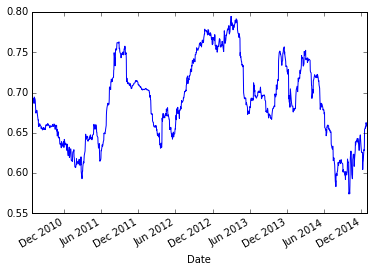

In [50]:
beta_over_time.plot()

In [51]:
X = sm.add_constant(returns['IWN'].values)
result = sm.OLS(returns['SPY'].values, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     7711.
Date:                Sun, 18 Oct 2015   Prob (F-statistic):               0.00
Time:                        20:59:58   Log-Likelihood:                 5239.9
No. Observations:                1257   AIC:                        -1.048e+04
Df Residuals:                    1255   BIC:                        -1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0002      0.000      1.947      0.0

In [47]:
print(np.cov(returns['GOOGL'], result.resid))
print(returns["GOOGL"].var())

[[  2.44122996e-04   1.29525904e-19]
 [  1.29525904e-19   6.24087531e-05]]
0.000244122995932


In [33]:
print(result.resid.size)
print(returns["GOOGL"].values.size)

1256
1257


In [28]:
np.cov(returns["GOOGL"].values, result.resid)

ValueError: all the input array dimensions except for the concatenation axis must match exactly